<a href="https://colab.research.google.com/github/natallia-neiva/avaliacao_de_modelos_em_machine_learning/blob/main/Avalia%C3%A7%C3%A3o_de_Modelos_em_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## 🔹 **Projeto Final: Avaliação de Modelos em Machine Learning**

---

### 📘 **Objetivo** - Desenvolver um projeto prático de avaliação de modelos, aplicando diferentes métricas de avaliação e técnicas de validação cruzada com datasets supervisionados (classificação).

### O dataset utilizado é o "Titanic". Neste dataset contém informações relevantes para treinamento do modelo que irá prever a sobrevivência dos passageiros.

##Carregando as Bibliotecas

###Verificando se há dados nulos

In [ ]:
#Verificando se há dados nulos

import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Dados Nulos**
Foram encontrados dados nulos nas seguintes colunas:

> "age", "embarked", "deck" e "embark_town"

Estes dados precisam ser tratados pois os dados nulos podem interferir no resultado do treinamento.

##🔹 Tratamento dos Dados, Treinamento, Predição e Avaliação

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# 1. Carregar o dataset
df = sns.load_dataset("titanic")

# 2. Selecionar colunas úteis e remover NaN
df['age'] = df['age'].fillna(df['age'].mean())

if df["deck"].dtype.name == "category":
    df["deck"] = df["deck"].cat.add_categories("Desconhecido")
    df["deck"] = df["deck"].fillna("Desconhecido")

df = df.dropna(subset=["embark_town", "embarked"])

# 3. Transformar variáveis categóricas em numéricas
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# 4. Separar X e y
X = df[['age', 'fare', 'sex', 'pclass']]
y = df['survived']

# 5. Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Treinar e avaliar modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Logistic Regression Accuracy: 0.81
Random Forest Accuracy: 0.81
KNN Accuracy: 0.69
Precision: 0.6111111111111112
Recall: 0.44


**INTERPRETAÇÃO DAS APLICAÇÕES DOS CÓDIGOS**

O dataset "titanic" foi carregado da biblioteca scikit-learn.
> Foi feito o tratamento da coluna "age" para preencheer com a média de idade os valores faltantes. O resultado do preenchimento foi atribuído de volta à coluna 'age', substituindo os valores originais.

> Na coluna "deck" foi adicionado um nova categoria "desconhecido", pois na categoria original só existe: A, B, C, D, E, F, G; onde 'A' é o mais alto e 'G' o mais baixo.
Após adicionado a categoria "desconhecido", foi feito o preenchimento dos valores faltantes (NaN) com esta nova categoria.

> Nas colunas "embark_town" e "embarked" foi removido todas as linhas onde pelo menos uma das colunas embark_town ou embarked tem valor NaN.

---

**TREINAMENTO, PREDIÇÃO E AVALIAÇÃO**

**Modelos Testados***:

1. Regressão Logística (Logistic Regression):

>📌 Prevê se algo é "Sim" (1) ou "Não" (0) (ex: sobreviveu ou não no Titanic).

>📌 Dá uma probabilidade (% de chance de ter sobrevivido") para respostas binárias (sim/não, 0/1).

2. Random Forest (Floresta Aleatória):

>📌 Combina várias árvores de decisão (como um grupo de amigos tomando uma decisão juntos).

>📌 Cada árvore vota, e o resultado final é o que a maioria decidir. Cada árvore faz perguntas simples (ex: "A pessoa é homem?" → "Pagou caro?"). No final, todas as árvores "votam" se a pessoa sobrevive ou não.

3. KNN (K-Nearest Neighbors / Vizinhos Mais Próximos)

>📌 Classifica algo baseado nos exemplos mais parecidos que já viu (ex: Se 5 dos seus vizinhos mais próximos sobreviveram, você provavelmente também sobreviveu).

>📌 Olha os "K" vizinhos mais próximos (ex: K=5 → os 5 casos mais similares).
Se a maioria deles é "Sim", então a resposta é "Sim".

---

**Loop de Treinamento e Avaliação**:

>📌 model.fit(X_train, y_train): Treina o modelo

>📌 y_pred = model.predict(X_test): Gera previsções

>📌 acc = accuracy_score(y_test, y_pred): Calcula a acurácia

>📌 print(f"{name} Accuracy: {acc:.2f}"): Exibe os reesultados

---

📊 **Resultados:**

1. Logistic Regression Accuracy: 0.81 - o modelo acertou 81% das previsões

>>Random Forest Accuracy: 0.81 - o modelo acertou 81% das previsões

2. KNN Accuracy: 0.69 - o modelo teve um desempenho inferior com 69%.

>>Precision: 0.6111111111111112 - Dos que o KNN previu como sobreviventes, 61% realmente sobreviveram

>>Recall: 0.44 - O KNN só identificou 44% de todos os verdadeiros sobreviventes.


In [ ]:
df = sns.load_dataset("titanic")

# 2. Selecionar colunas úteis e remover NaN
df['age'] = df['age'].fillna(df['age'].mean())

if df["deck"].dtype.name == "category":
    df["deck"] = df["deck"].cat.add_categories("Desconhecido")
    df["deck"] = df["deck"].fillna("Desconhecido")

df = df.dropna(subset=["embark_town", "embarked"])

#Matriz de Confusão

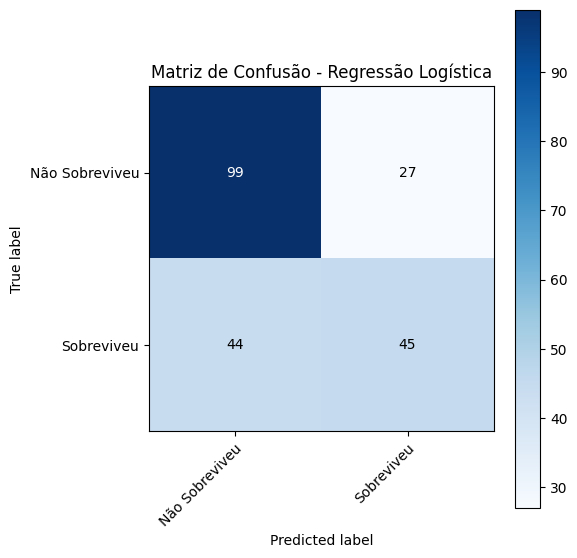

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Definir a matriz de confusão (EXEMPLO - substitua pelos seus valores)
VN, FP, FN, VP = 99, 27, 44, 45  # Seus valores aqui
cm = np.array([[VN, FP],
               [FN, VP]])

# 2. Plotar
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Não Sobreviveu', 'Sobreviveu']
ax.set(xticks=np.arange(len(classes)),
       yticks=np.arange(len(classes)),
       xticklabels=classes, yticklabels=classes,
       ylabel='True label',
       xlabel='Predicted label',
       title='Matriz de Confusão - Regressão Logística')

# Formatação dos textos
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

##Interpretação da matriz de confusão
> Linha = o que realmente aconteceu

> Coluna = o que o modelo previu

> A diagonal principal (↘) mostra os acertos.

> Os números fora da diagonal são erros

---

|                         | **Previu: Não Sobreviveu** | **Previu: Sobreviveu** |
| ----------------------- | -------------------------- | ---------------------- |
| **Era: Não Sobreviveu** | **✅ 99** (acertou)        | **❌ 27** (errou)       |
| **Era: Sobreviveu**     | **❌ 44** (errou)           | **✅ 45** (acertou)     |

---

| Tipo                         | Quantidade | Explicação                                                               |
| ---------------------------- | ---------- | ------------------------------------------------------------------------ |
| **Verdadeiro Negativo (VN)** | 99        | O modelo disse que **não sobreviveu**, e realmente **não sobreviveu**. ✅ |
| **Falso Positivo (FP)**      | 27         | O modelo disse que **sobreviveu**, mas **não sobreviveu**. ❌             |
| **Falso Negativo (FN)**      | 44         | O modelo disse que **não sobreviveu**, mas **sobreviveu**. ❌             |
| **Verdadeiro Positivo (VP)** | 45         | O modelo disse que **sobreviveu**, e realmente **sobreviveu**. ✅         |


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Dados da matriz de confusão
VN = 99
FP = 27
FN = 44
VP = 45

# Preparando os arrays de valores reais e previstos
# 0 = Não Sobreviveu, 1 = Sobreviveu
y_real = np.array([0]*(VN + FP) + [1]*(FN + VP))  # [0,0,...,0,1,1,...,1]
y_pred = np.array([0]*VN + [1]*FP + [0]*FN + [1]*VP)  # Valores previstos

# Cálculo das métricas
acuracia = accuracy_score(y_real, y_pred)
precisao = precision_score(y_real, y_pred)
recall = recall_score(y_real, y_pred)
f1 = f1_score(y_real, y_pred)

# Exibindo os resultados
print(f"""
Métricas de Avaliação:
--------------------------------
Acurácia (Accuracy): {acuracia:.2%}  → (VP+VN)/Total
Precisão (Precision): {precisao:.2%} → VP/(VP+FP)
Recall (Sensibilidade): {recall:.2%} → VP/(VP+FN)
F1-Score: {f1:.2%}          → Média harmônica entre Precisão e Recall

Matriz de Confusão Detalhada:
--------------------------------
{'':<20} {'Previsto Não':<15} {'Previsto Sim':<15}
{'Real Não':<20} {f'VN = {VN}':<15} {f'FP = {FP}':<15}
{'Real Sim':<20} {f'FN = {FN}':<15} {f'VP = {VP}':<15}
""")

# Cálculo adicional de Especificidade
especificidade = VN / (VN + FP)
print(f"Especificidade: {especificidade:.2%} → VN/(VN+FP) (Capacidade de detectar 'não sobreviventes')")


Métricas de Avaliação:
--------------------------------
Acurácia (Accuracy): 66.98%  → (VP+VN)/Total
Precisão (Precision): 62.50% → VP/(VP+FP)
Recall (Sensibilidade): 50.56% → VP/(VP+FN)
F1-Score: 55.90%          → Média harmônica entre Precisão e Recall

Matriz de Confusão Detalhada:
--------------------------------
                     Previsto Não    Previsto Sim   
Real Não             VN = 99         FP = 27        
Real Sim             FN = 44         VP = 45        

Especificidade: 78.57% → VN/(VN+FP) (Capacidade de detectar 'não sobreviventes')


## 🔹 Fatores que Influenciaram a Decisão do Modelo

> sex (0 ou 1) --> Mulheres (1) tiveram prioridade nos botes salva-vidas (o modelo pode captar essa relação).
> pclass (1, 2, 3) --> Passageiros de classes superiores (1ª) tinham mais acesso a botes (maior chance de sobreviver).
> age	--> Crianças e idosos podem ter prioridade (o modelo pode identificar faixas etárias críticas).
> fare --> Tarifas mais altas (ligadas à 1ª classe) podem indicar maior chance de sobrevivência.

In [ ]:
## "0" indica "não sobreviveu" e "1" indica "sobreviveu"
contar = df['survived'].value_counts()
print(contar)

survived
0    549
1    340
Name: count, dtype: int64


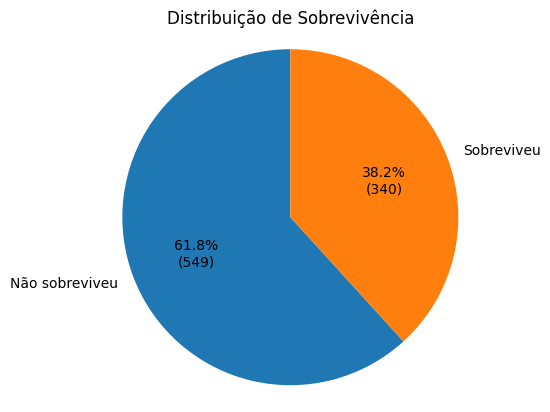

In [ ]:
import matplotlib.pyplot as plt
nomes = ['Não sobreviveu', 'Sobreviveu']
def func(pct, allvals):
    valor_absoluto = int(round(pct/100 * sum(allvals)))
    return f'{pct:.1f}%\n({valor_absoluto})'
plt.pie(contar, labels=nomes, autopct=lambda pct: func(pct, contar), startangle=90)
plt.title('Distribuição de Sobrevivência')
plt.axis('equal')
plt.show()

**📈 Interpretação do Gráfico Distribuição de Sobrevivência**
> Os números mostram que dos 889 tripulantes, 340 pessoas sobreviveram o que representa 38,2% do total; e 549 pessoas não sobreviveram, representando 61,8% do total de tripulantes.

In [ ]:
# Selecionar e limpar as colunas desejadas
dados = df[['sex', 'age', 'pclass', 'fare']].dropna()

#Mostrar a contagem de cada uma

#Contagem da Classe
value_counts = dados['pclass'].value_counts()
print(value_counts)

#contagem da idade
value_counts = dados['age'].value_counts()
print(value_counts)


#Contagem valor da tarifa do bilhete
value_counts = dados['fare'].value_counts()
print(value_counts)

df.head()

pclass
3    491
1    214
2    184
Name: count, dtype: int64
age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64
fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 247, dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Desconhecido,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Desconhecido,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Desconhecido,Southampton,no,True


sex
male      577
female    312
Name: count, dtype: int64


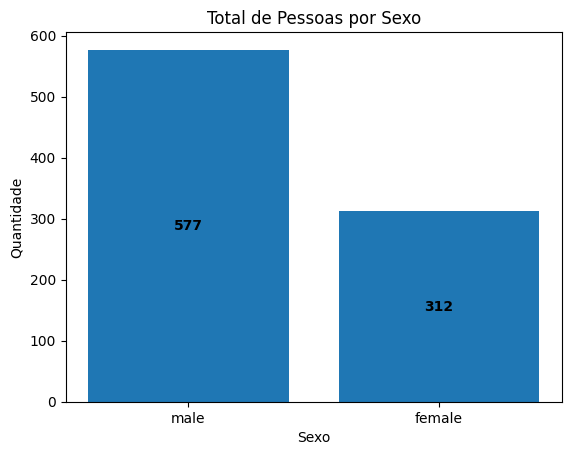

sex
female    231
male      109
Name: survived, dtype: int64


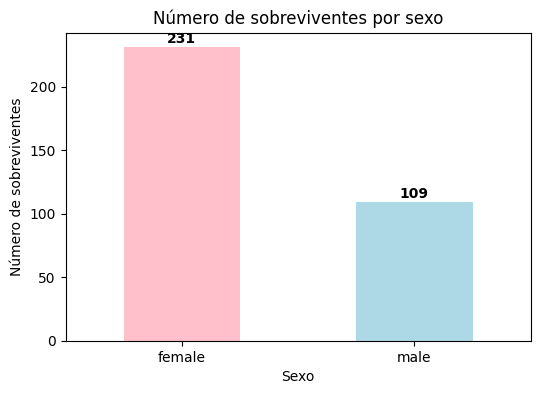

In [ ]:
#contagem por sexo
contagem = dados['sex'].value_counts().rename({0: 'male', 1: 'female'})
print(contagem)

plt.bar(contagem.index, contagem.values)
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Total de Pessoas por Sexo')
for i, valor in enumerate(contagem.values):
    plt.text(i, valor / 2, str(valor), ha='center', va='center', color='black', fontweight='bold')
plt.show()

#Total de sobreviventes por sexo
sobreviventes_por_sexo = df.groupby('sex')['survived'].sum()
print(sobreviventes_por_sexo)


#Representação gráfica
import matplotlib.pyplot as plt

sobreviventes_por_sexo = df.groupby('sex')['survived'].sum()

fig, ax = plt.subplots(figsize=(6,4))
sobreviventes_por_sexo.plot(kind='bar', color=['pink', 'lightblue'], ax=ax)

# Definir os rótulos no eixo x
ax.set_xticklabels(['female', 'male'], rotation=0)

# Adicionar rótulos em cima das barras
for i, valor in enumerate(sobreviventes_por_sexo):
    ax.text(i, valor + 1, str(int(valor)), ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Sexo')
ax.set_ylabel('Número de sobreviventes')
ax.set_title('Número de sobreviventes por sexo')

plt.show()



**📈 Interpretação dos Gráficos Total de Pessoas e Número de Sobreviventes por Sexo**
> A representação gráfica aponta que 577 tripulantes são homens e 312 são mulheres.
> Os números apontam que dos 577 tripulantes homens 109 sobeviveram, e 312 tripulantes mulheres 231 sobreviveram.

In [ ]:
# Calcular a média da coluna 'age'
media_idade = df['age'].mean()

# Exibir o resultado
print("Média de idade:", media_idade)

# Calcular a média da coluna 'fare'
media_fare = df['fare'].mean()
print("Média da tarifa (fare): {:.2f}".format(media_fare))


Média de idade: 29.65344637067425
Média da tarifa (fare): 32.10


pclass
3    491
1    214
2    184
Name: count, dtype: int64


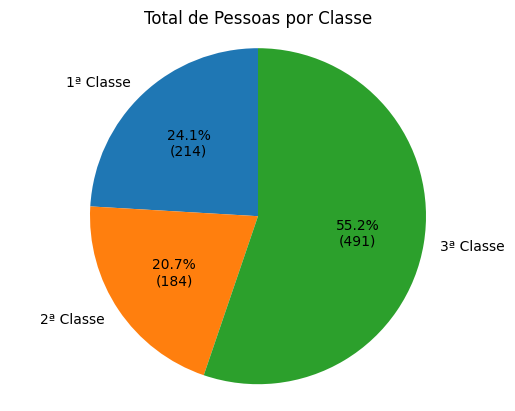

pclass
1    134
2     87
3    119
Name: survived, dtype: int64


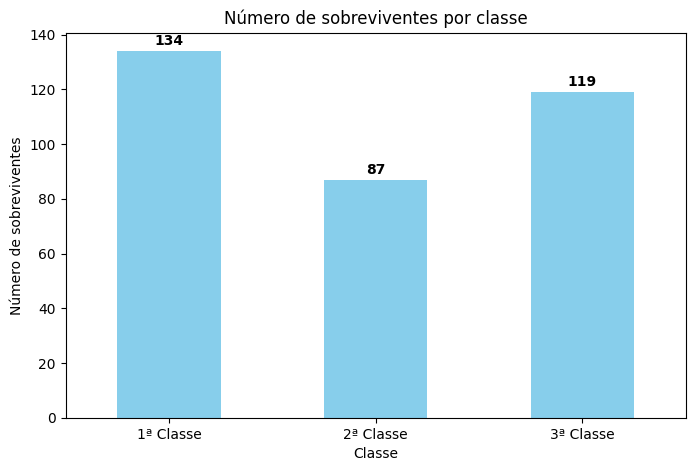

In [ ]:
#Contagem Distribuição por classe

value_counts = df['pclass'].value_counts()
print(value_counts)

import matplotlib.pyplot as plt

# Contagem das classes
value_counts = df['pclass'].value_counts().sort_index()

# Mapeando os índices para nomes descritivos
nomes_classes = {1: "1ª Classe", 2: "2ª Classe", 3: "3ª Classe"}
labels = [nomes_classes[classe] for classe in value_counts.index]

# Criando o gráfico de pizza
import matplotlib.pyplot as plt

# Supondo que value_counts e labels já estejam definidos
# Exemplo:
# value_counts = df['pclass'].value_counts().sort_index()
# labels = ['1ª Classe', '2ª Classe', '3ª Classe']

def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

plt.pie(value_counts, labels=labels, autopct=lambda pct: func(pct, value_counts), startangle=90)
plt.title("Total de Pessoas por Classe")
plt.axis('equal')  # para o gráfico ficar circular
plt.show()



#Sobreviventes por classe

sobreviventes_por_classe = df.groupby('pclass')['survived'].sum()
print(sobreviventes_por_classe)


#Representação Gráfica
import matplotlib.pyplot as plt

sobreviventes_por_classe = df.groupby('pclass')['survived'].sum()

fig, ax = plt.subplots(figsize=(8,5))
sobreviventes_por_classe.plot(kind='bar', color='skyblue', ax=ax)

# Mapear números da classe para nomes mais legíveis
labels = ['1ª Classe', '2ª Classe', '3ª Classe']
ax.set_xticklabels(labels, rotation=0)

# Adicionar rótulos em cima das barras
for i, valor in enumerate(sobreviventes_por_classe):
    ax.text(i, valor + 1, str(int(valor)), ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Classe')
ax.set_ylabel('Número de sobreviventes')
ax.set_title('Número de sobreviventes por classe')

plt.show()


**📈 Interpretação dos Gráficos Total de Pessoas e Número de Sobreviventes por Sexo**

> Os números mostram que na classe 1 haviam 214 tripulantes, classe 2 184 e classe 3 491.

> A classe 3 foi a classe com maior quantidade de pessoas e a classe 2 com menor quantidade.

> Os números revelam que na classe 1, dentre os 214 tripularantes, 134 sobreviveram. Na classe 2 dos 184 tripulantes, 87 sobreviveram. Na classe 3 dos 491 tripulantes, 119 soberviveram.


age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    0
70.50    0
71.00    0
74.00    0
80.00    1
Name: survived, Length: 88, dtype: int64


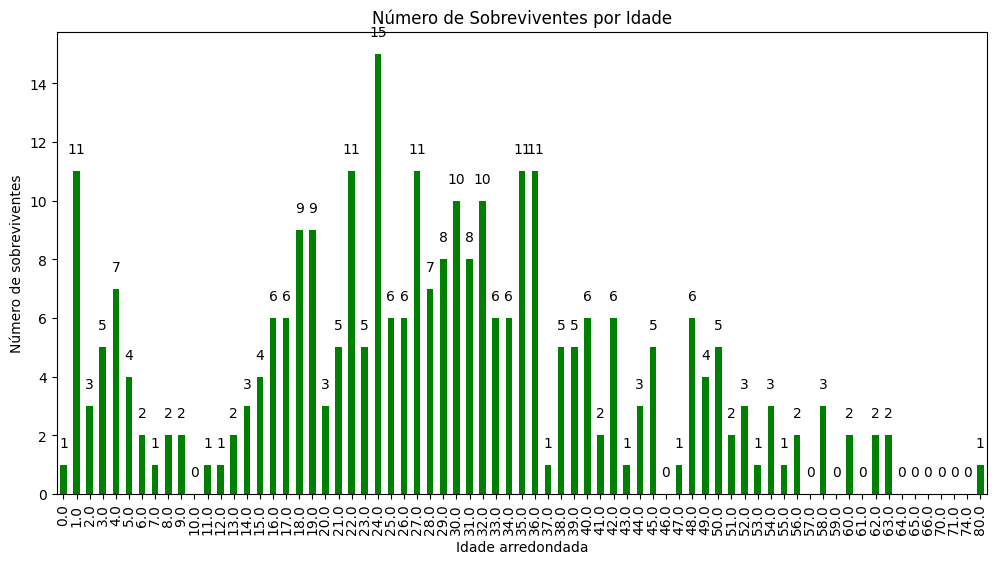

In [ ]:
#Sobreviventes por idade
# Agrupar por idade e somar a coluna 'survived' para contar sobreviventes por idade
sobreviventes_por_idade = df.groupby('age')['survived'].sum()

print(sobreviventes_por_idade)


import matplotlib.pyplot as plt

# Arredondar idades
df['age_rounded'] = df['age'].round()

# Agrupar e somar sobreviventes por idade arredondada
sobreviventes_por_idade = df.groupby('age_rounded')['survived'].sum()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(12,6))
sobreviventes_por_idade.plot(kind='bar', color='green', ax=ax)

# Adicionar rótulos em cima das barras
for i, valor in enumerate(sobreviventes_por_idade):
    ax.text(i, valor + 0.5, str(int(valor)), ha='center', va='bottom')

ax.set_xlabel('Idade arredondada')
ax.set_ylabel('Número de sobreviventes')
ax.set_title('Número de Sobreviventes por Idade')

plt.show()


**📈 Interpretação do Gráfico Número de Sobreviventes por Idade**

> A 2 faixas etárias de idades que tiveram maior número de sobeviventes foram:

>> 15 sobreviventes tinham 24 anos. Foi a maior faixa etária com sobeviventes.

>> Em seguida as idades de 1 ano, 22 anos, 35 anos e 36 anos, com 11 soberviventes cada um delas.

>> As idades de 10 anos, 46, 57, 59, 61, 64, 65, 66, 70, 71 e 74 anos não tiveram nenhum sobrevivente.


##📘 Interpretação dos Resultados

📌 **Fatores que Influenciaram a Sobrevivência no Titanic:**

**📘 1. Desempenho dos Modelos**

**Regressão Logística e Random Forest (81% acurácia):**

> "Mulheres sobrevivem mais" → Se o passageiro era mulher (sex=female), tinha alta chance de sobreviver.

> "Quanto mais rico, mais chances" → Passageiros da 1ª classe (pclass=1) foram prioritários nos botes.

> "Crianças primeiro" → Idades baixas (age < 10) aumentavam a chance de sobrevivência.

--

**KNN**

> É ineficiente com dados desbalanceados

> Problema: O dataset tem 61.8% de não sobreviventes vs. 38.2% de sobreviventes.

> Impacto: Como o KNN classifica com base na "maioria vizinha", ele tende a favorecer a classe dominante (não sobreviventes), resultando em recall baixo (44%) - muitos sobreviventes reais são classificados como "não sobreviventes".

> Precision (61%): Quando previa "sobreviveu", acertava apenas ~6 em 10 vezes.

> Recall (44%): Identificava menos da metade dos verdadeiros sobreviventes (muitos falsos negativos).

> Precisa de dados bem preparados (normalizados, sem variáveis categóricas brutas).

Conclui-se que este modelo não foi eficiente nesta análise.

---


**📘 2. Fatores Determinantes**

🔷 Classe Social (Pclass)

Classe 1: 214 passageiros → 134 sobreviveram (62,6%)

Classe 2: 184 passageiros → 87 sobreviveram (47,3%)

Classe 3: 491 passageiros → 119 sobreviveram (24,2%)

✅ Conclusão: Quanto mais alta a classe, maior a chance de sobrevivência (prioridade nos botes salva-vidas).

--

🔷 Gênero (Sex)

Homens: 577 passageiros → 109 sobreviveram (18,9%)

Mulheres: 312 passageiros → 231 sobreviveram (74,0%)

✅ Conclusão: "Mulheres e crianças primeiro" foi rigidamente aplicado.

--

🔷 Sobrevivência Geral

Total de sobreviventes: 340 (38,2%) vs. Não sobreviventes: 549 (61,8%).

✅ Conclusão: Desbalanceamento claro — a maioria não sobreviveu.

---

**📘 3. Matriz de Confusão**

> Falsos Positivos (FP): 27 pessoas previstas como sobreviventes mas morreram.

> Falsos Negativos (FN): 44 sobreviventes reais não foram identificados.

✅ Padrão de Erro: O modelo comete mais falsos negativos (errou em capturar sobreviventes reais), possivelmente subestimando grupos como mulheres da 3ª classe.

---

🎯 **Conclusão**

Os resultados confirmam o contexto histórico:

> Mulheres e classes altas tiveram prioridade nos botes -

> Homens e 3ª classe foram os grupos mais sacrificados.

> Modelos lineares (Regressão Logística) performaram tão bem quanto Random Forest, indicando que padrões simples (ex: sex=female → survive) já explicam boa parte da variabilidade.